# apple 주식 EMA

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

In [23]:
path = "/content/drive/MyDrive/Colab Notebooks/dataset/머신러닝/apple_stock.csv"
df = pd.read_csv(path)

df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index("Date")
df

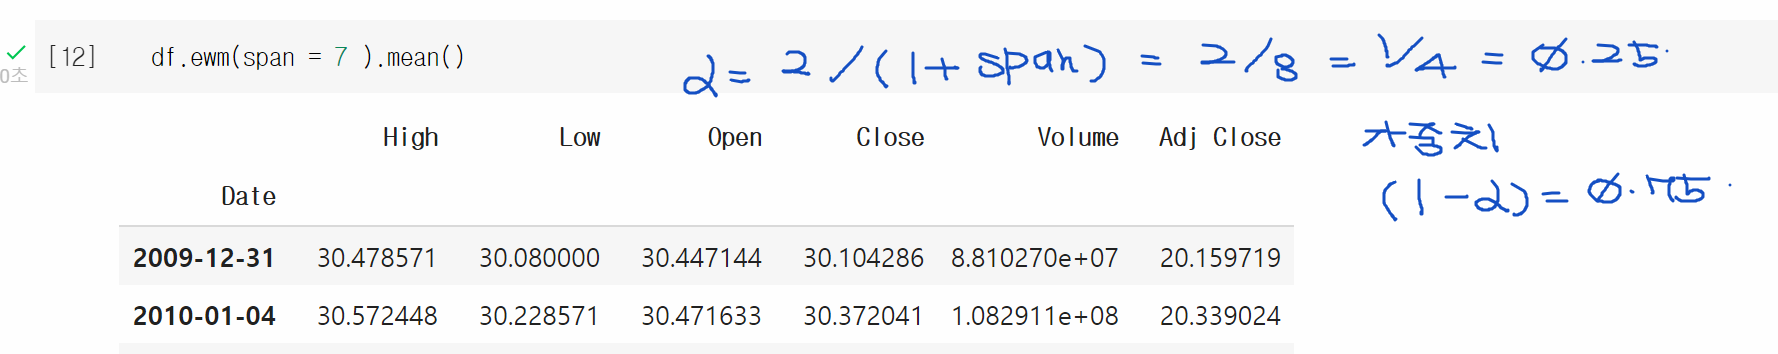


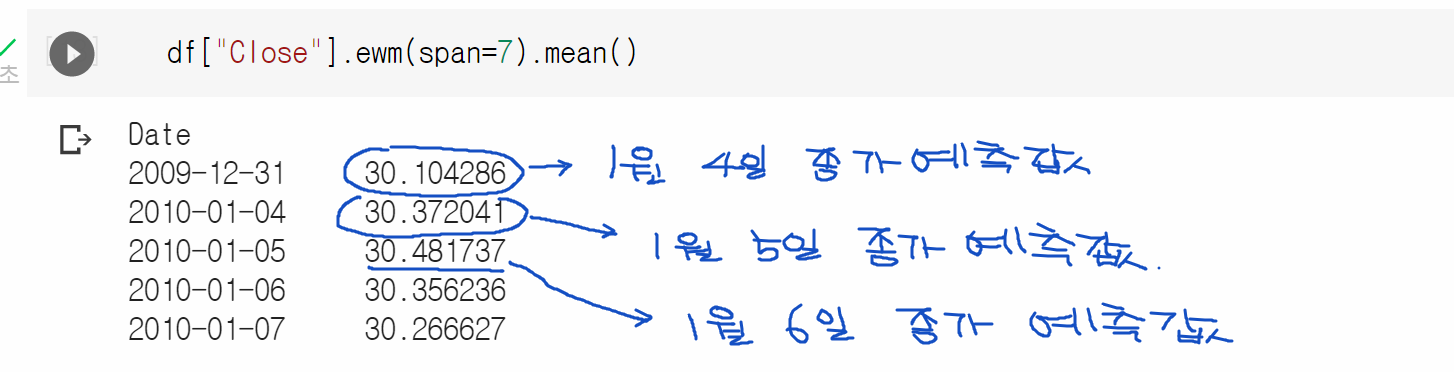

In [ ]:
# 종가 7일 지수 이동 평균
# 예측 값들이 한줄씩 내려줘야 맞음
# 마지막은 한줄 추가 해줌
df['Close'].ewm(span = 7).mean()

# datetime 생성
last_day = datetime(2019, 1, 2)

# 새로운 열 close 칸에 -100 저장 나머지는 결측치
df.loc[last_day,"Close"] = -100


In [35]:
df.tail(1)

,High,Low,Open,Close,Volume,Adj Close,Close_7Span_Mean
Date,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,156.983005


In [37]:
# 없는데 줄추가 loc/ 없는데 바꾸는거?..
# 계산 안되게 결측치로 변경
df.loc [last_day , "Close"] = np.nan

df["Close_7Span_Mean"] = df["Close"].ewm(span=7).mean().shift(1)
df[["Close", "Close_7Span_Mean"]]

,Close,Close_7Span_Mean
Date,,
2009-12-31,30.104286,NaN
2010-01-04,30.572857,30.104286
2010-01-05,30.625713,30.372041
2010-01-06,30.138571,30.481737
2010-01-07,30.082857,30.356236
...,...,...
2018-12-26,157.169998,157.139004
2018-12-27,156.149994,157.146753
2018-12-28,156.229996,156.897563


## 계산

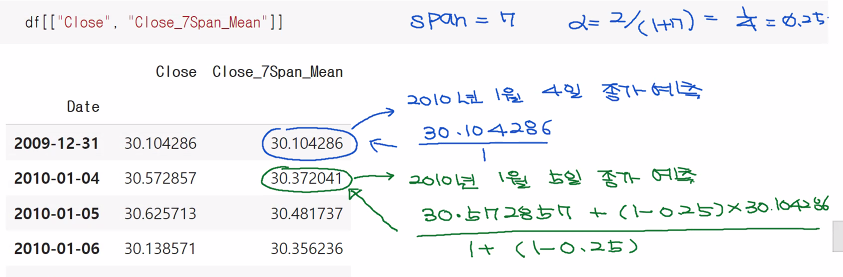

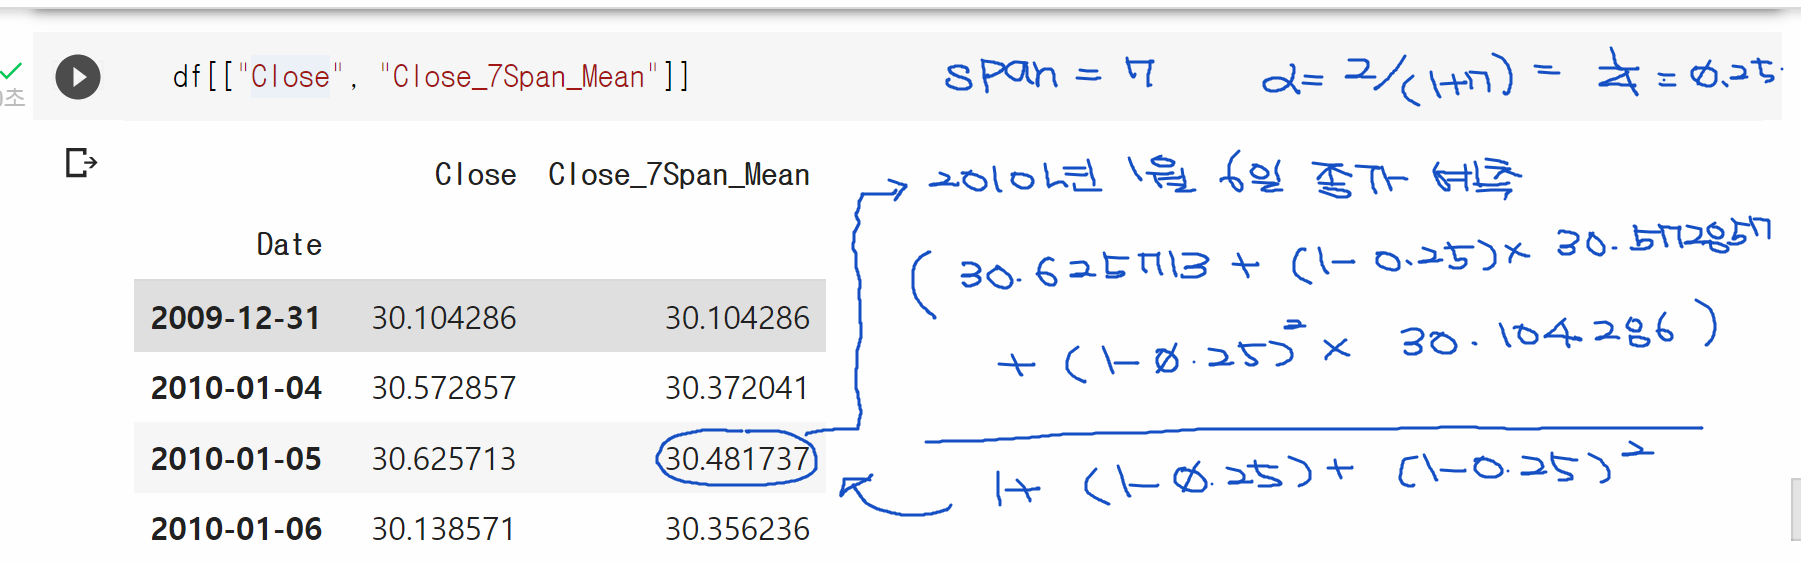

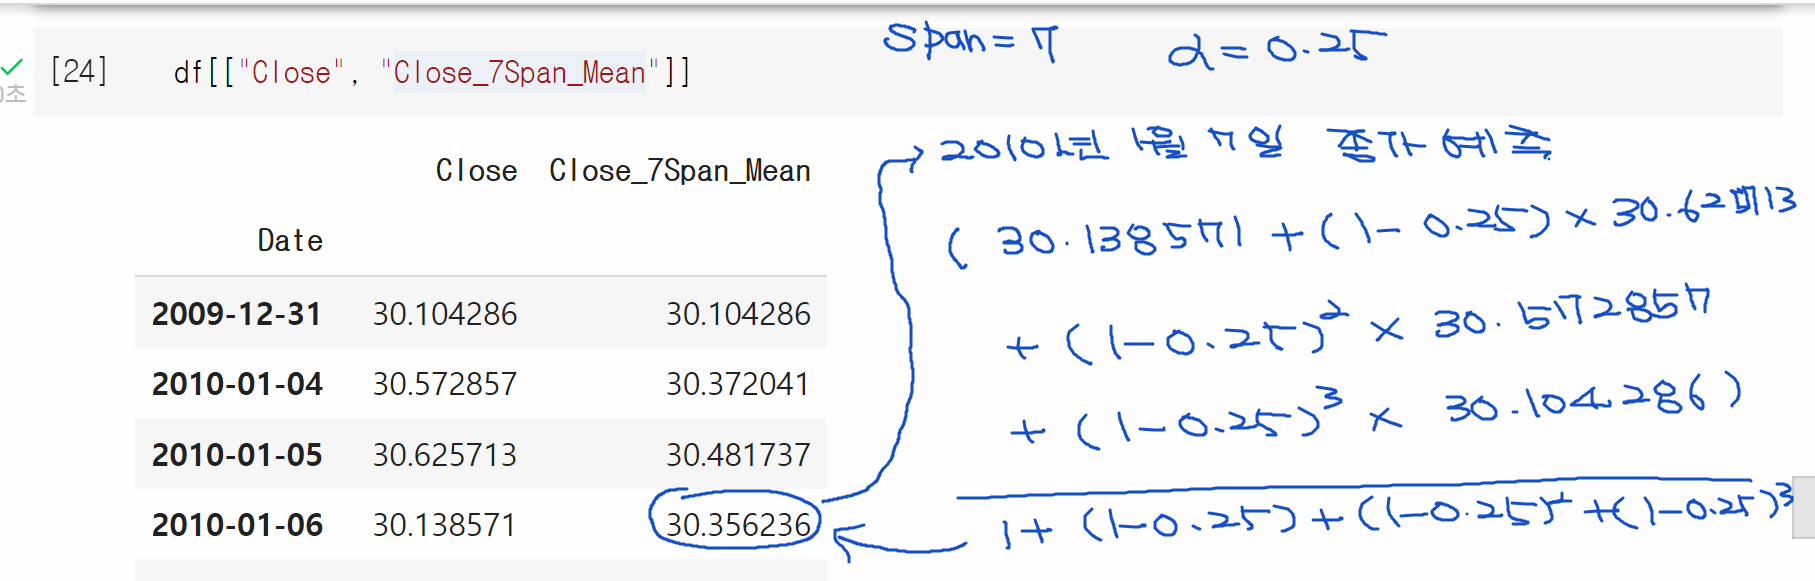

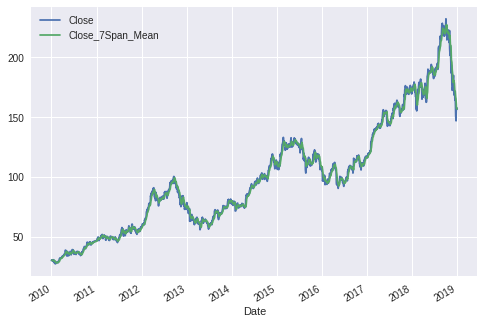

In [38]:
df["Close_7Span_Mean"].shift(1)
df["Close_7Span_Mean"] = df["Close_7Span_Mean"].shift(1)
df[["Close", "Close_7Span_Mean"]]

plt.style.use("seaborn")
df[["Close","Close_7Span_Mean"]].plot()

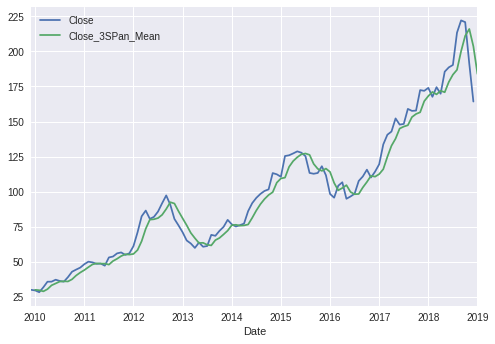

In [34]:
# 월 별그룹, 그룹명(마지막날)
df[["Close"]].resample(rule="M")

# resample만 하면 그룹만 지어놔서 출력이 되지않아 list형대로 담아 
# 내용물 보기
list( df[["Close"]].resample(rule="M") )

# 종가 월별 예측 평균
df[["Close"]].resample(rule="M").mean()

df_monthly = df[["Close"]].resample(rule="M").mean()
df_monthly

# 월별 종가 펴균 예측
df_monthly["Close_3SPan_Mean"] = df_monthly["Close"].ewm(span=3).mean()

df_monthly["Close_3SPan_Mean"] = df_monthly["Close_3SPan_Mean"].shift(1)
df_monthly.plot()

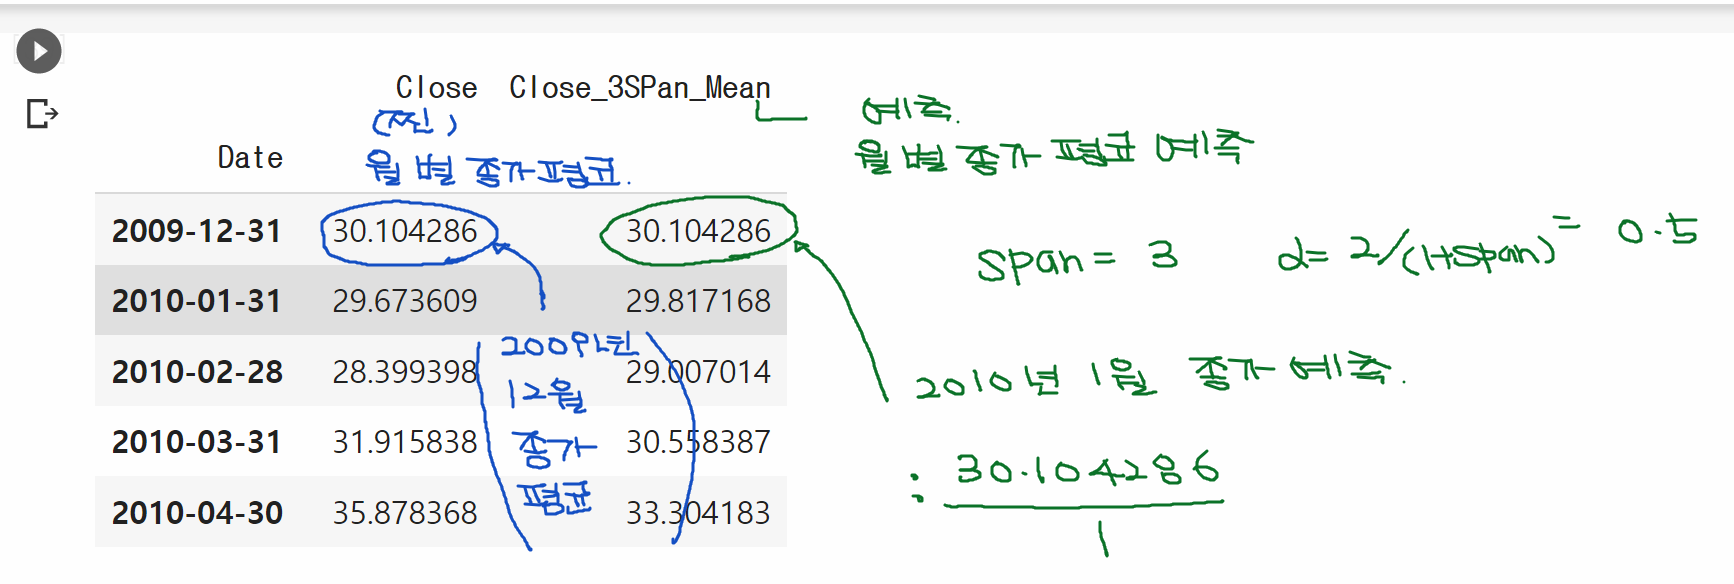

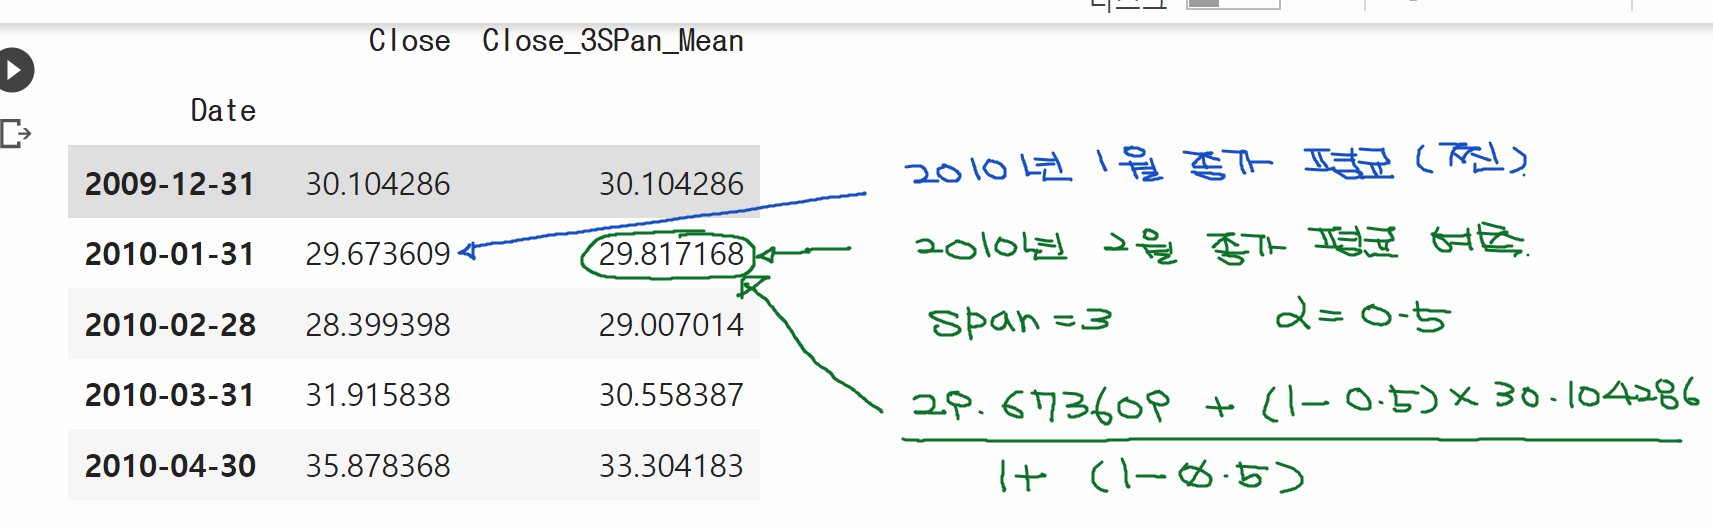

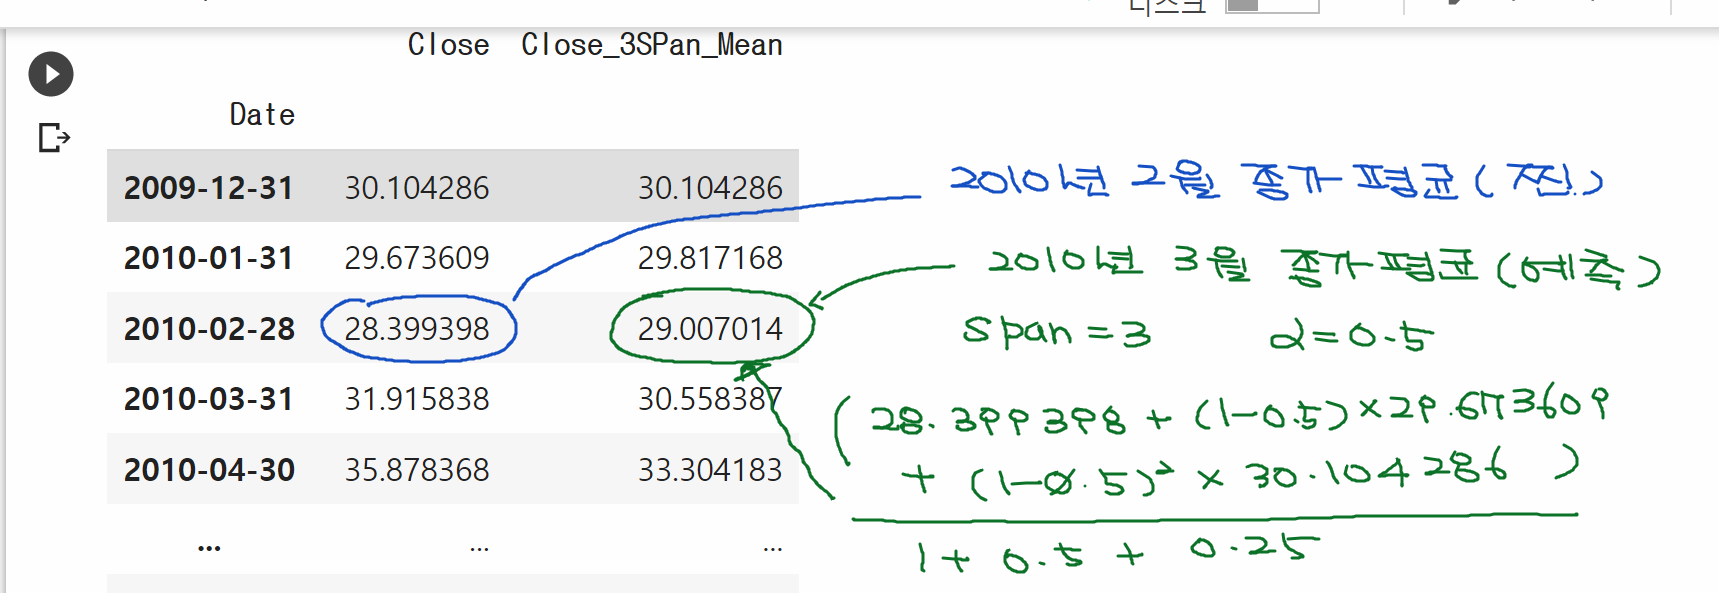

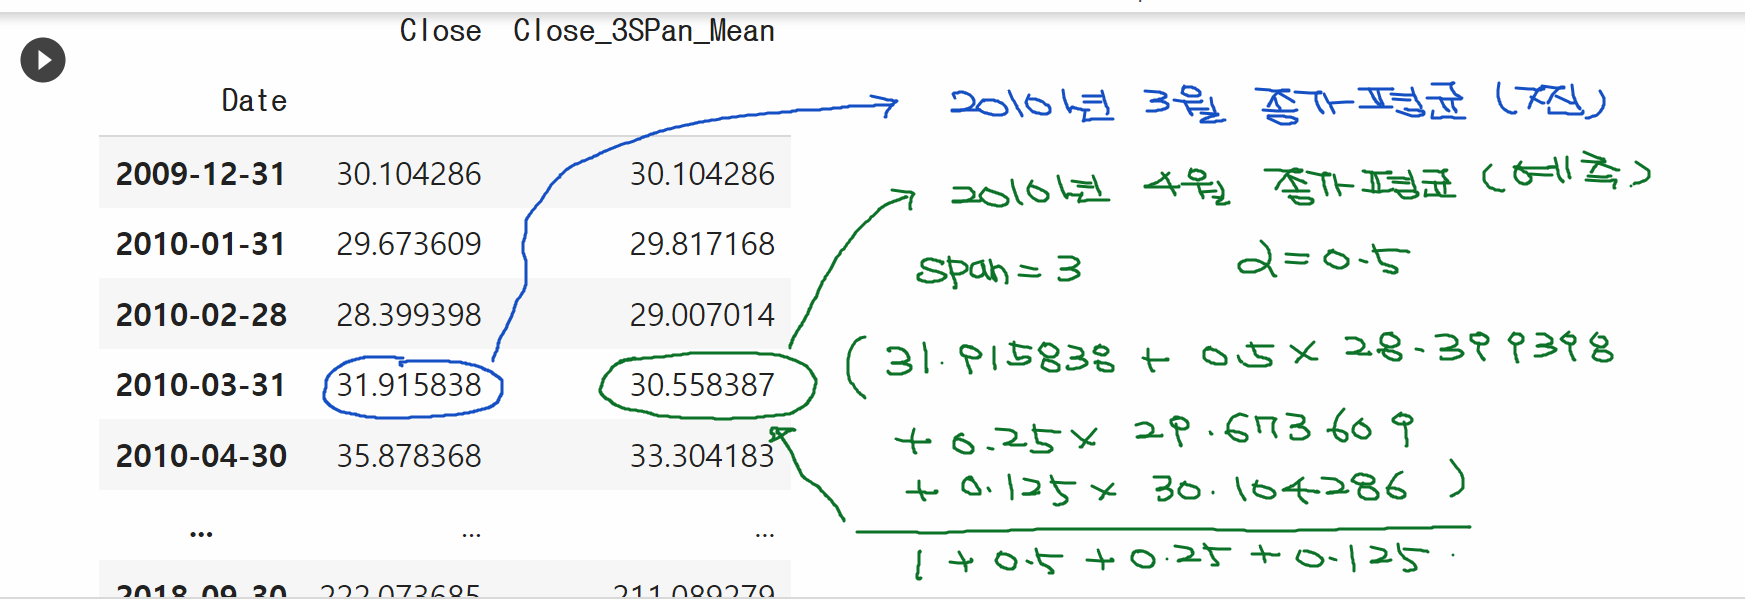

# 224~235

In [51]:
# 2020년 8월부터 일요일 8번 조회
# W : 주 / M : 월
df = pd.DataFrame({
    'week' : pd.date_range(start = "2021-08-06", periods=8, freq = 7*"1d"),
    'sales' : [39, 44, 40, 45, 38, 43, 39, np.nan],
    "3EMA" : [0] * 8
    })

df["3EMA"] = df[["sales"]].ewm(span = 3).mean().shift(1)

# 지수 이동 평균을 계산할 함수
# data : 지수 이동 평균을 계산할 데이터
# span : 지수 이동 평균의 거리 = 3

def myEWMA(data, span):
  ewma = [0] * len(data) # 지수 이동 평균을 계산해서 저장할 리스트
  분자 = 0
  분모 = 0

# 값에 곱해지는 가중치 2 / 1 + span
  alpha = 2.0 /(1.0 + span)
  
  for i in range(len(data)):
    # 분자 계산 data+(1-alpha)앞의 데이터
    분자 = (data[i] + (1.0-alpha)* 분자)
    # 분모 계산 (1-alpha)의 i승
    분모 += (1-alpha) ** i
    print("index:", i)
    print("분자:", 분자)
    print("분모:", 분모)

    # 지수 이동 평균 계산
    ewma[i] = 분자/분모
  return ewma

# sales 컬럼의 지수 이동 평균 계산
# 3주마다의 지수 이동평균 계산
myEWMA(df['sales'], 3)

# 최근 3주의 이동평균 계산
df["3EMA"] = df[["sales"]].ewm(span=3).mean().shift(1)
df

index: 0
분자: 39.0
분모: 1.0
index: 1
분자: 63.5
분모: 1.5
index: 2
분자: 71.75
분모: 1.75
index: 3
분자: 80.875
분모: 1.875
index: 4
분자: 78.4375
분모: 1.9375
index: 5
분자: 82.21875
분모: 1.96875
index: 6
분자: 80.109375
분모: 1.984375
index: 7
분자: nan
분모: 1.9921875


[39.0,
 42.333333333333336,
 41.0,
 43.13333333333333,
 40.483870967741936,
 41.76190476190476,
 40.37007874015748,
 nan]

# 237 ~ 257


## 주식 가격 예측

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [68]:
plt.style.use("ggplot")

Text(0.5, 1.0, 'Close Price for Apple')

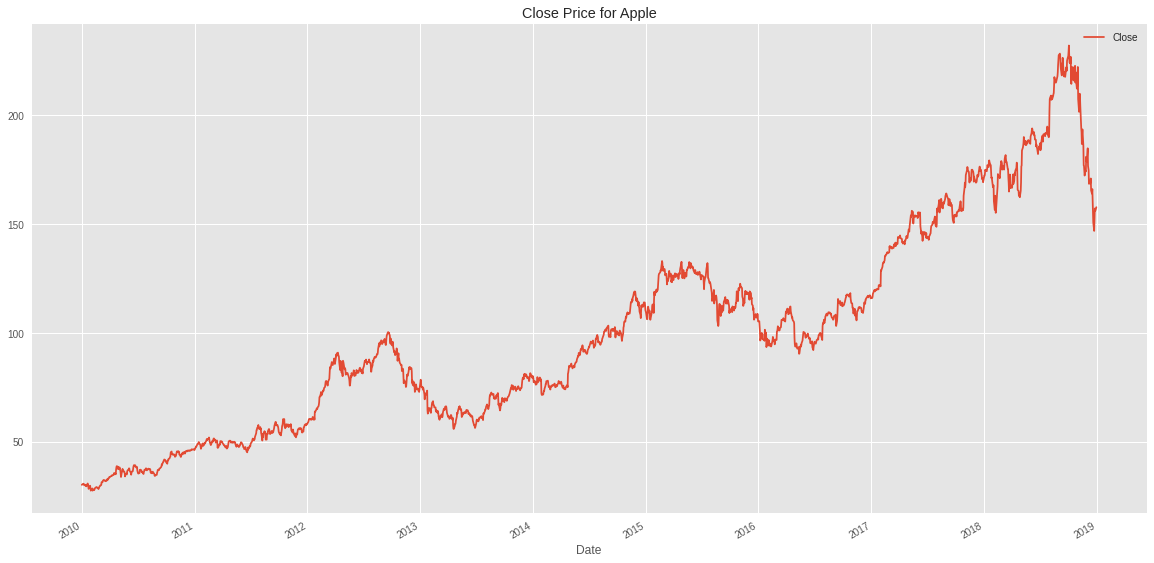

In [69]:
path = "/content/drive/MyDrive/Colab Notebooks/dataset/머신러닝/apple_stock.csv"
df = pd.read_csv(path)

pd.to_datetime(df["Date"])
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)
df

df[['Close']].plot(figsize=(20, 10))
plt.title('Close Price for Apple')

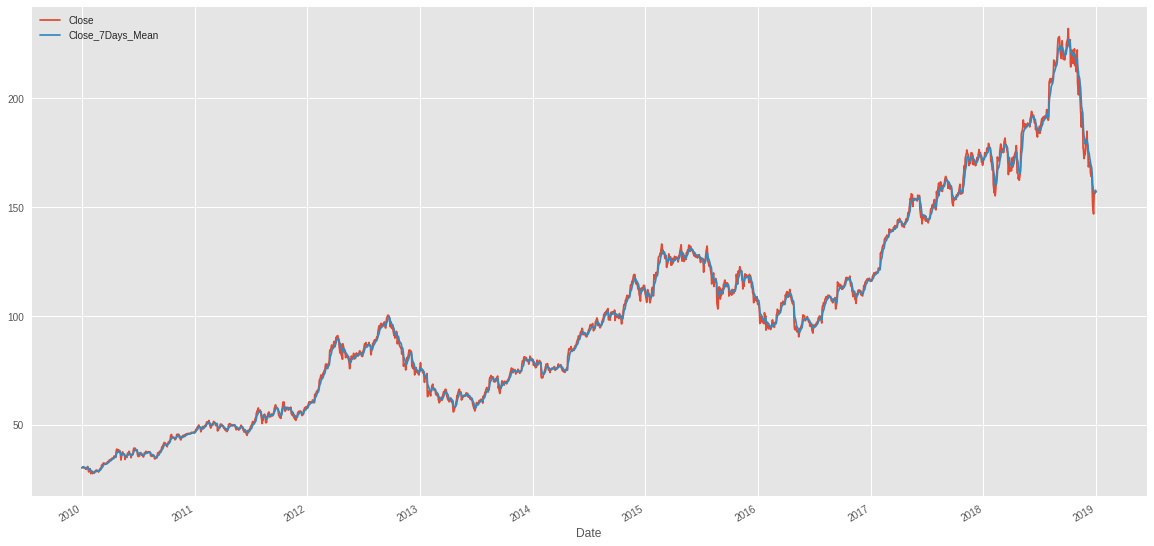

In [74]:
# 2019년 1월 2일 생성
last_day = datetime(2019, 1, 2)
last_day

# 행 추가 / 종가를 결측치로 대입
df.loc[last_day, "Close"] = np.nan
df.tail(1)

# 최근 7일간의 지수 이동 평균 주식 예측
df['Close'].ewm(span=7).mean()

# 데이터프레임에 지수이동 평균 결과를 Close_7Days_Mean 컬럼에 추가
df['Close_7Days_Mean'] = df['Close'].ewm(span=7).mean()

df[["Close", "Close_7Days_Mean"]]

df[["Close", "Close_7Days_Mean"]].plot(figsize=(20, 10))


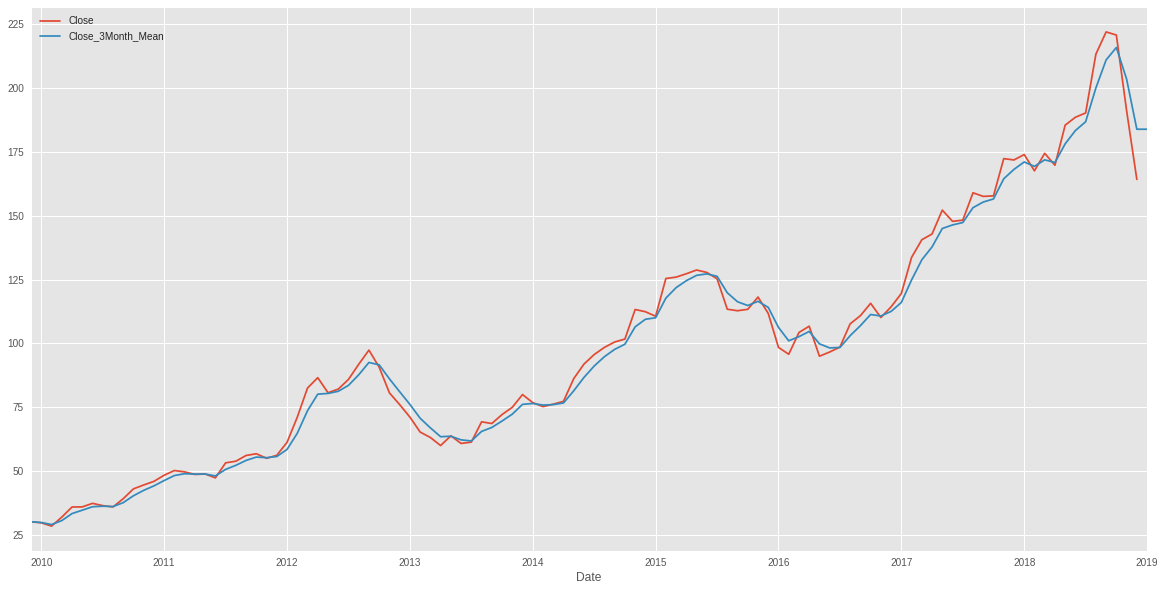

In [75]:
# 월 단위로 주식 가격의 평균을 샘플링
df_monthly = df.resample(rule='M').mean()
df_monthly = df_monthly.iloc[ : , : -1]

# 최근 3개월 간의 종가 지수 이동 평균을 주식 예측
df_monthly["Close_3Month_Mean"] = df_monthly['Close'].ewm(span=3).mean()
df_monthly[["Close" ,"Close_3Month_Mean"]]
df_monthly[["Close" ,"Close_3Month_Mean"]].plot(figsize=(20,10))